# Classifying Movie Reviews Exercise

## Decoding the Input Reviews

In [1]:
from keras.datasets import imdb

sample_data = imdb.load_data()[0][0][1]

s = ""
word_index = imdb.get_word_index()

# switches values and keys in imdbs dictionary:
reversed_index = dict([(value, key) for (key, value) in word_index.items()])

# decodes the second review from the dataset:
decoded_text = " ".join([reversed_index.get(i - 3, "|") for i in sample_data])

print(decoded_text)


| big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal measures the hair is big lots of boobs bounce men wear those cut tee shirts that show off their stomachs sickening that men actually wore them and the music is just synthesiser trash that plays over and over again in almost every scene there is trashy music boobs and paramedics taking away bodies and the gym still doesn't close for bereavement all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then


## Creating a Neural Network and Testing Different Approaches

### Initial setup:

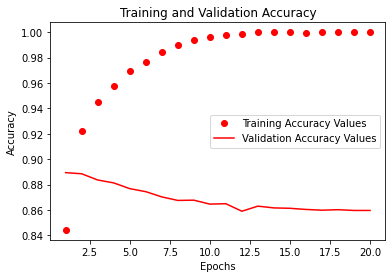

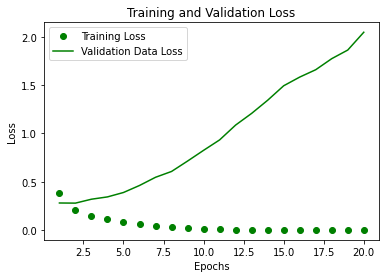

In [2]:
import numpy as np
from keras import layers, models
from keras.datasets import imdb


def Plot_Train_Val_Acc(history):
    import matplotlib.pyplot as plt

    plt.clf()

    history_dict = history.history
    accuracy_values = history_dict["accuracy"]
    val_accuracy_values = history_dict["val_accuracy"]

    epochs = range(1, len(accuracy_values) + 1)

    plt.plot(epochs, accuracy_values, "ro", label="Training Accuracy Values")
    plt.plot(epochs, val_accuracy_values, "r", label="Validation Accuracy Values")
    plt.title("Training and Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.show()

    return None


def Plot_Train_Val_Loss(history):
    import matplotlib.pyplot as plt

    plt.clf()

    history_dict = history.history
    loss_values = history_dict["loss"]
    val_loss_values = history_dict["val_loss"]

    epochs = range(1, len(loss_values) + 1)

    plt.plot(epochs, loss_values, "go", label="Training Loss")
    plt.plot(epochs, val_loss_values, "g", label="Validation Data Loss")
    plt.title("Training and Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()

    return None


def vectorizing_the_sequences(sequences, dimension=10000):
    result_vector_set = np.zeros((len(sequences), dimension))

    for i, sequence in enumerate(sequences):
        result_vector_set[i, sequence] = 1

    return result_vector_set


(train_data, train_labels) = imdb.load_data(num_words=10000)[0]

train_data = vectorizing_the_sequences(train_data)

train_labels = np.asarray(train_labels).astype("float32")


neural_network = models.Sequential()
neural_network.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
neural_network.add(layers.Dense(16, activation="relu"))
neural_network.add(layers.Dense(1, activation="sigmoid"))

neural_network.compile(
    optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"]
)

train_data_val = train_data[:10000]
partial_train_data = train_data[10000:]

train_labels_val = train_labels[:10000]
partial_train_labels = train_labels[10000:]

history = neural_network.fit(
    partial_train_data,
    partial_train_labels,
    epochs=20,
    batch_size=100,
    validation_data=(train_data_val, train_labels_val),
    verbose=0,
)


Plot_Train_Val_Acc(history)

Plot_Train_Val_Loss(history)


# result - overtrained


### Changing the number of epchs to 5:

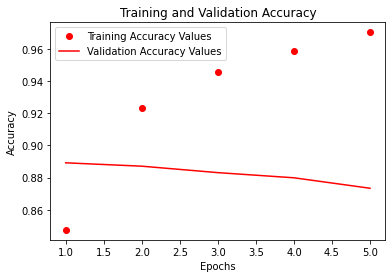

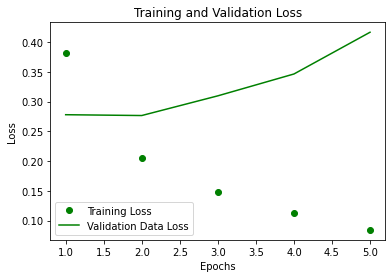

In [1]:
import numpy as np
from keras import layers, models
from keras.datasets import imdb


def Plot_Train_Val_Acc(history):
    import matplotlib.pyplot as plt

    plt.clf()

    history_dict = history.history
    accuracy_values = history_dict["accuracy"]
    val_accuracy_values = history_dict["val_accuracy"]

    epochs = range(1, len(accuracy_values) + 1)

    plt.plot(epochs, accuracy_values, "ro", label="Training Accuracy Values")
    plt.plot(epochs, val_accuracy_values, "r", label="Validation Accuracy Values")
    plt.title("Training and Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.show()

    return None


def Plot_Train_Val_Loss(history):
    import matplotlib.pyplot as plt

    plt.clf()

    history_dict = history.history
    loss_values = history_dict["loss"]
    val_loss_values = history_dict["val_loss"]

    epochs = range(1, len(loss_values) + 1)

    plt.plot(epochs, loss_values, "go", label="Training Loss")
    plt.plot(epochs, val_loss_values, "g", label="Validation Data Loss")
    plt.title("Training and Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()

    return None


def vectorizing_the_sequences(sequences, dimension=10000):
    result_vector_set = np.zeros((len(sequences), dimension))

    for i, sequence in enumerate(sequences):
        result_vector_set[i, sequence] = 1

    return result_vector_set


(train_data, train_labels) = imdb.load_data(num_words=10000)[0]

train_data = vectorizing_the_sequences(train_data)

train_labels = np.asarray(train_labels).astype("float32")


neural_network = models.Sequential()
neural_network.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
neural_network.add(layers.Dense(16, activation="relu"))
neural_network.add(layers.Dense(1, activation="sigmoid"))

neural_network.compile(
    optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"]
)

train_data_val = train_data[:10000]
partial_train_data = train_data[10000:]

train_labels_val = train_labels[:10000]
partial_train_labels = train_labels[10000:]

history = neural_network.fit(
    partial_train_data,
    partial_train_labels,
    epochs=5,
    batch_size=100,
    validation_data=(train_data_val, train_labels_val),
    verbose=0,
)


Plot_Train_Val_Acc(history)

Plot_Train_Val_Loss(history)


# result - overtrained (on purpose)


### Looking at the performance of the optimal configuration:

In [2]:
import numpy as np
from keras import layers, models
from keras.datasets import imdb


def Plot_Train_Val_Acc(history):
    import matplotlib.pyplot as plt

    plt.clf()

    history_dict = history.history
    accuracy_values = history_dict["accuracy"]
    val_accuracy_values = history_dict["val_accuracy"]

    epochs = range(1, len(accuracy_values) + 1)

    plt.plot(epochs, accuracy_values, "ro", label="Training Accuracy Values")
    plt.plot(epochs, val_accuracy_values, "r", label="Validation Accuracy Values")
    plt.title("Training and Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.show()

    return None


def Plot_Train_Val_Loss(history):
    import matplotlib.pyplot as plt

    plt.clf()

    history_dict = history.history
    loss_values = history_dict["loss"]
    val_loss_values = history_dict["val_loss"]

    epochs = range(1, len(loss_values) + 1)

    plt.plot(epochs, loss_values, "go", label="Training Loss")
    plt.plot(epochs, val_loss_values, "g", label="Validation Data Loss")
    plt.title("Training and Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()

    return None


def vectorizing_the_sequences(sequences, dimension=10000):
    result_vector_set = np.zeros((len(sequences), dimension))

    for i, sequence in enumerate(sequences):
        result_vector_set[i, sequence] = 1

    return result_vector_set


(train_data, train_labels) = imdb.load_data(num_words=10000)[0]

train_data = vectorizing_the_sequences(train_data)

train_labels = np.asarray(train_labels).astype("float32")


neural_network = models.Sequential()
neural_network.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
neural_network.add(layers.Dense(16, activation="relu"))
neural_network.add(layers.Dense(16, activation="relu"))
neural_network.add(layers.Dense(1, activation="sigmoid"))

neural_network.compile(
    optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"]
)

train_data_val = train_data[:10000]
partial_train_data = train_data[10000:]

train_labels_val = train_labels[:10000]
partial_train_labels = train_labels[10000:]

history = neural_network.fit(
    partial_train_data,
    partial_train_labels,
    epochs=3,
    batch_size=512,
    validation_data=(train_data_val, train_labels_val),
    verbose=0,
)


Plot_Train_Val_Acc(history)

Plot_Train_Val_Loss(history)


MemoryError: Unable to allocate 1.86 GiB for an array with shape (25000, 10000) and data type float64

## Training of the model

In [ ]:
import os

import numpy as np
from keras import layers, models
from keras.datasets import imdb


def vectorizing_the_sequences(sequences, dimension=10000):

    result_vector_set = np.zeros((len(sequences), dimension))

    for i, sequence in enumerate(sequences):
        result_vector_set[i, sequence] = 1

    return result_vector_set


def vectorizing_the_labels(train_labels):

    result_vector = np.asarray(train_labels).astype("float32")

    return result_vector


(train_data, train_labels) = imdb.load_data(num_words=10000)[0]

train_data = vectorizing_the_sequences(train_data)

train_labels = vectorizing_the_labels(train_labels)


neural_network = models.Sequential()
neural_network.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
neural_network.add(layers.Dense(16, activation="relu"))
neural_network.add(layers.Dense(16, activation="relu"))
neural_network.add(layers.Dense(1, activation="sigmoid"))

neural_network.compile(
    optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"]
)


neural_network.fit(train_data, train_labels, epochs=3, batch_size=512)

neural_network.save(os.path.basename("trained_network.h5"))


## Testing the Neural Network

In [ ]:
import os

import numpy as np
from keras.datasets import imdb
from tensorflow.keras.models import load_model


def vectorizing_the_sequences(sequences, dimension=10000):

    result_vector_set = np.zeros((len(sequences), dimension))

    for i, sequence in enumerate(sequences):
        result_vector_set[i, sequence] = 1

    return result_vector_set


def vectorizing_the_labels(train_labels):

    result_vector = np.asarray(train_labels).astype("float32")

    return result_vector


network = load_model(os.path.basename("trained_network.h5"))

(test_data, test_labels) = imdb.load_data(num_words=10000)[1]
test_data = vectorizing_the_sequences(test_data)
test_labels = vectorizing_the_labels(test_labels)

test_loss, test_accuracy = network.evaluate(test_data, test_labels, verbose=0)

print("Test Loss:     ", test_loss)
print("Test Accuracy: ", test_accuracy)


## Classifying Actual Movie Reviews

In [ ]:
import os
import re

import numpy as np
from tensorflow.keras.models import load_model


def encode(review, dimension=10000):

    from keras.datasets import imdb

    word_index = imdb.get_word_index()
    encoded_review = []
    for word in review:
        index = word_index.get(word)
        if type(index) == int and index < 10000:
            encoded_review.append(index)

        else:
            pass

    return encoded_review


def vectorize_sqnce_of_rvws(sqnce_of_rvws, dimension=10000):

    result_vectors = np.zeros((len(sqnce_of_rvws), dimension))

    for i, review in enumerate(sqnce_of_rvws):
        result_vectors[i, review] = 1

    return result_vectors


number_of_rvws = int(input())

if number_of_rvws >= 1:
    sqnce_of_rvws = []

    for i in range(number_of_rvws):
        print("Enter the review number ", i + 1, ":")

        review = input()
        review = re.split(r"[,;.?!* |]", review)
        review = encode(review)

        sqnce_of_rvws.append(review)

    sqnce_of_rvws = vectorize_sqnce_of_rvws(sqnce_of_rvws)
    network = load_model(os.path.basename("trained_network.h5"))

    predicted_class = network.predict(sqnce_of_rvws)
    

    counter = 0
    for result in predicted_class:
        counter += 1

        if result[0] > 0.5:
            print(counter, "'s review is positive")
            print("The grade is:", result[0], '\n')
            
        else:
            print(counter, "'s review is negative")
            print("The grade is:", result[0], '\n')
            


else:
    pass


## Input data:

1st review grade = B-

2nd review grade = A

2

1st:

The feature film debut as a writer-director for Romola Garai, a British actress-turned-filmmaker, is a good one despite a misguided slow pace she uses to get to her horror story. Ms. Garai turns in an intelligent horror film that’s worth seeing alone for its brilliant photography (of the lush country colors compared to the bleak city colors) by Laura Bellingham. If you may, it’s a disquieting psychological mood film rather than a scare film. It tells about an accidental flophouse fire forcing a highly educated refugee, an ex-soldier (it’s not clear from what civil war), living in London, Tomaz (Alec Secareanu, Romanian star), to be homeless. He’s offered a room by a friendly nun (Imelda Staunton), in an old moldy home, falling apart, where he will help a lonely and dour young woman, Magda (Carla Juri), fix it up while she cares for her terminally ill mysterious dying mother (Anah Ruddin) who is confined to the attic.

After Tomaz moves in, he begins a cautious relationship with Magda, while his head is filled with flashbacks of the war when he was border guard and how his once promising life has lost its spark.

It’s a slow burn film, one that turns increasingly sinister as suddenly inexplicable and ugly things start happening, and by its third act all sorts of things get thrown into the narrative. The horror comes at the viewer much too fast to take it all in at once, as the young woman seems to be enslaved to do the bidding in the other world of her rage-filled mother (as its questionable execution shows Ms. Garai’s talent but also her inexperience as a director).

Even with fine performances by the entire cast, their characters are thinly drawn–which means we fail to care enough about them as things become more affecting. Still, despite such faults, it remains a curious film, one with a feminist twist, plus one with plenty of ideas and surprises.

It’s a promising film for a promising director, one who still hasn’t arrived but has been noticed.

2nd:

Remember Dogme 95? Lars von Trier and Tomas Vinterberg’s puritan film-making ethos? No studio work, live sound only, no incidental music, no lighting, handheld camera. And even no credit for the director (was that the same Lars von Trier?).

Even its founders abandoned it, but Andy Lambert keeps the pure and minimalist flame burning. His Mute series has just three rules: 1. No dialogue; 2. No camera moves; and 3. Only one shot.

What we get are miniatures that draw equally on Dogme and on classic silents. Mute films are about two minutes long, and Andy has made fifteen so far. The rules don’t necessarily mean they have to be quirky and funny, but they are. And wry. And telling. And sometimes ridiculous (cardboard boxes getting jiggy? A man literally late for his own funeral?).

The outstanding Mute, in my opinion, is Cover Story. It takes longer to describe than to watch, so how about just clicking on the screener?

Oh well, if you insist: A man and a woman, both in black jeans and coats with red jumpers, both carrying bags, and each reading a book, walk on different streets towards the same corner, where they will inevitably bump into each other. They receive a text at the same time, and both hold their books in their mouths, to free a hand to check the message. This is how they meet at the corner: perfect mirror images of each other. They laugh, still with books in mouths. They look at the titles of each other’s book. Their faces fall. What seemed to be the magical makings of a perfect relationship was doomed from the outset. Why?

Now watch it here to find out, or go to muteseries.com to see the whole brilliant series. 

